In [5]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import os 
from datetime import datetime 

In [19]:
#mian data folder
data_dir="data/"
g = os.walk(data_dir)  
attach_delay=[]
dirs=[]
for path,dir_list,file_list in g:  
    for file_name in file_list:  
        filepath=os.path.join(path, file_name)
        # print(filepath)  
        try:
            with open(filepath) as f:
                lines=f.readlines()
                #registration start from `sending attach request to GMM, domain CS:YES, PS:NO`, end at `UMTS-REG-ATT-CS: REG_ATTACH_PENDING`.
                for line in lines:
                    if "sending attach request to GMM, domain CS:YES, PS:NO" in line:
                        send=datetime.strptime(line.split()[1],"%H:%M:%S.%f")
                    if "UMTS-REG-ATT-CS: REG_ATTACH_PENDING" in line:
                        attached=datetime.strptime(line.split()[1],"%H:%M:%S.%f")
                if path in dirs and (attached-send).total_seconds() in attach_delay:
                    continue
                else:
                    attach_delay.append((attached-send).total_seconds())
                    dirs.append(path)
        except Exception as e:
            # print(e)
            pass

In [16]:
attach_delay_sc310=[]
#mian data folder
sc_dir="data"
g = os.walk(sc_dir)  
for path,dir_list,file_list in g:  
    for file_name in file_list:  
        filepath=os.path.join(path, file_name)
        if "data-plane" not in filepath and "txt" in filepath:
            # print(filepath)
            try:
                with open(filepath) as f:
                    lines=f.readlines()
                    send=0
                    attached=0
                    for line in lines:
                        #registration start from `GMM current state is S_GMM_REG_INIT`, end at `GMM current state is S_GMM_REG_S_NORMAL_SERV`.
                        if "GMM current state is S_GMM_REG_INIT" in line and send==0:
                            send=datetime.strptime(line.split(']')[0].split()[1],"%H:%M:%S.%f")
                            # print(line)
                        if "GMM current state is S_GMM_REG_S_NORMAL_SERV" in line and attached==0:
                            attached=datetime.strptime(line.split(']')[0].split()[1],"%H:%M:%S.%f")
                            # print(line)
                    if send!=0 and attached!=0:
                        attach_delay_sc310.append((attached-send).total_seconds())
            except:
                pass


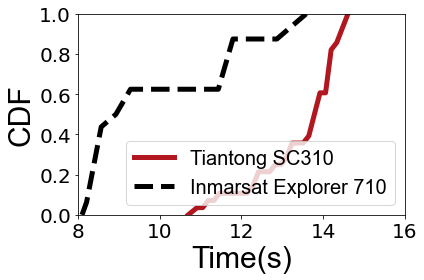

In [18]:
ecdf = sm.distributions.ECDF(attach_delay_sc310)
x = np.linspace(min(attach_delay_sc310), max(attach_delay_sc310), len(attach_delay_sc310))
y = ecdf(x)

ecdf2 = sm.distributions.ECDF(attach_delay)
x_2 = np.linspace(min(attach_delay), max(attach_delay), len(attach_delay))
y_2 = ecdf2(x_2)

font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 30,
}


font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 20,
}
x=np.concatenate([[10.7],x])
y=np.concatenate([[0],y])
x_2=np.concatenate([[8.1],x_2])
y_2=np.concatenate([[0],y_2])
plt.figure(figsize=(6, 4))
plt.ylim(0, 1)
plt.xlim(8, 16)
plt.plot(x, y,color="#B0171F",linewidth="5", label="Tiantong SC310")
plt.plot(x_2, y_2,linestyle = 'dashed',color="black",linewidth="5",label="Inmarsat Explorer 710")
plt.xlabel("Time(s)",font1)
plt.ylabel("CDF",font1)
plt.legend(prop=font2,loc = 'lower right')

plt.tick_params(labelsize=20)

plt.tight_layout()
# plt.savefig('figure5b.pdf')
plt.show()